In [175]:
# Core Python Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotting
from plotnine import (
    ggplot, aes,
    geom_col, geom_line, geom_smooth,
    facet_wrap,
    scale_y_continuous, scale_x_continuous,
    labs, expand_limits, 
    theme, theme_minimal, theme_matplotlib, element_text
)

from mizani.breaks import date_breaks
from mizani.formatters import date_format, currency_format

# Misc
from os import mkdir, getcwd, path

from rich import pretty
pretty.install()


ModuleNotFoundError: No module named 'rich'

In [7]:
import warnings
from openpyxl import Workbook

In [15]:
# 2.0 Importing Data Files ----
# help(pd.read_excel)
# - Use "q" to quit

# getcwd()
bikes_df = pd.read_excel('../00_data_raw/bikes.xlsx', engine="openpyxl")
bikes_shops_df = pd.read_excel('../00_data_raw/bikeshops.xlsx', engine="openpyxl")
orderlines_df = pd.read_excel(
    io='../00_data_raw/orderlines.xlsx',
    converters={'order.date': str},
    engine="openpyxl"
)

# bikes_df.head(10)
# # bike = path.abspath("")
# def get_local_folder():
#     return path.dirname(path.realpath('00_data_raw/bikes.xlsx'))

# rt_fldr = get_local_folder()
# print(f'rel: {rt_fldr}')
bikes_shops_df
bikes_df.head(10)
orderlines_df

/home/kodnashion/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default


,Unnamed: 0,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,1,2011-01-07 00:00:00,2,48,1
1,2,1,2,2011-01-07 00:00:00,2,52,1
2,3,2,1,2011-01-10 00:00:00,10,76,1
3,4,2,2,2011-01-10 00:00:00,10,52,1
4,5,3,1,2011-01-10 00:00:00,6,2,1
...,...,...,...,...,...,...,...
15639,15640,2000,4,2015-12-25 00:00:00,15,14,1
15640,15641,2000,5,2015-12-25 00:00:00,15,90,1
15641,15642,2000,6,2015-12-25 00:00:00,15,17,1
15642,15643,2000,7,2015-12-25 00:00:00,15,70,1


In [16]:
s = bikes_df['description']

In [17]:
freq_count_series = s.value_counts()

In [18]:
freq_count_series.nlargest()

Mountain - Cross Country Race - Carbon    14
Road - Elite Road - Aluminum              11
Road - Endurance Road - Carbon            11
Road - Elite Road - Carbon                10
Mountain - Sport - Aluminum                9
Name: description, dtype: int64

In [19]:
top5_bikes_series = bikes_df['description'].value_counts().nlargest()

In [20]:
?pd.Series.plot

In [21]:
top5_bikes_series

Mountain - Cross Country Race - Carbon    14
Road - Elite Road - Aluminum              11
Road - Endurance Road - Carbon            11
Road - Elite Road - Carbon                10
Mountain - Sport - Aluminum                9
Name: description, dtype: int64

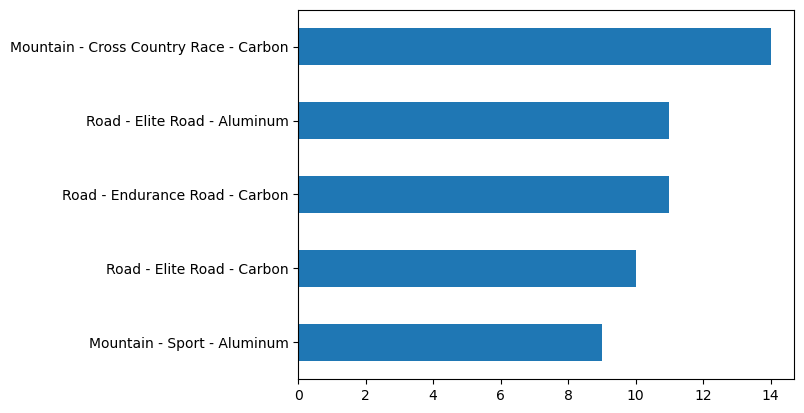

In [22]:
fig1 = top5_bikes_series.plot(kind='barh')
fig1.invert_yaxis()

In [24]:
fig2 = pd.Series.plot(top5_bikes_series)
fig2
plt.show()

In [26]:
orderlines_df = pd.DataFrame(orderlines_df)

In [35]:
bike_order_lines_joined_df = orderlines_df \
    .drop(columns='Unnamed: 0', axis=1) \
    .merge(
    right = bikes_df,
    how='left',
    left_on='product.id',
    right_on='bike.id'
) \
    .merge(
    right = bikes_shops_df,
    how = 'left',
    left_on = 'customer.id',
    right_on = 'bikeshop.id'
)

In [36]:
bike_order_lines_joined_df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location
0,1,1,2011-01-07 00:00:00,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY"
1,1,2,2011-01-07 00:00:00,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,2,1,2011-01-10 00:00:00,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS"
3,2,2,2011-01-10 00:00:00,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS"
4,3,1,2011-01-10 00:00:00,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25 00:00:00,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX"
15640,2000,5,2015-12-25 00:00:00,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX"
15641,2000,6,2015-12-25 00:00:00,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX"
15642,2000,7,2015-12-25 00:00:00,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX"


In [37]:
df = bike_order_lines_joined_df

In [38]:
df2 = bike_order_lines_joined_df.copy()

In [39]:
df2

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location
0,1,1,2011-01-07 00:00:00,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY"
1,1,2,2011-01-07 00:00:00,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,2,1,2011-01-10 00:00:00,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS"
3,2,2,2011-01-10 00:00:00,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS"
4,3,1,2011-01-10 00:00:00,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25 00:00:00,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX"
15640,2000,5,2015-12-25 00:00:00,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX"
15641,2000,6,2015-12-25 00:00:00,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX"
15642,2000,7,2015-12-25 00:00:00,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX"


In [40]:
# Handling dates

df['order.date']

0        2011-01-07 00:00:00
1        2011-01-07 00:00:00
2        2011-01-10 00:00:00
3        2011-01-10 00:00:00
4        2011-01-10 00:00:00
                ...         
15639    2015-12-25 00:00:00
15640    2015-12-25 00:00:00
15641    2015-12-25 00:00:00
15642    2015-12-25 00:00:00
15643    2015-12-25 00:00:00
Name: order.date, Length: 15644, dtype: object

In [41]:
df['order.date'] = pd.to_datetime(df['order.date'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order.id       15644 non-null  int64         
 1   order.line     15644 non-null  int64         
 2   order.date     15644 non-null  datetime64[ns]
 3   customer.id    15644 non-null  int64         
 4   product.id     15644 non-null  int64         
 5   quantity       15644 non-null  int64         
 6   bike.id        15644 non-null  int64         
 7   model          15644 non-null  object        
 8   description    15644 non-null  object        
 9   price          15644 non-null  int64         
 10  bikeshop.id    15644 non-null  int64         
 11  bikeshop.name  15644 non-null  object        
 12  location       15644 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 1.7+ MB


In [45]:
# Show effect: Copy vs No Copy

bike_order_lines_joined_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order.id       15644 non-null  int64         
 1   order.line     15644 non-null  int64         
 2   order.date     15644 non-null  datetime64[ns]
 3   customer.id    15644 non-null  int64         
 4   product.id     15644 non-null  int64         
 5   quantity       15644 non-null  int64         
 6   bike.id        15644 non-null  int64         
 7   model          15644 non-null  object        
 8   description    15644 non-null  object        
 9   price          15644 non-null  int64         
 10  bikeshop.id    15644 non-null  int64         
 11  bikeshop.name  15644 non-null  object        
 12  location       15644 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 1.7+ MB


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order.id       15644 non-null  int64 
 1   order.line     15644 non-null  int64 
 2   order.date     15644 non-null  object
 3   customer.id    15644 non-null  int64 
 4   product.id     15644 non-null  int64 
 5   quantity       15644 non-null  int64 
 6   bike.id        15644 non-null  int64 
 7   model          15644 non-null  object
 8   description    15644 non-null  object
 9   price          15644 non-null  int64 
 10  bikeshop.id    15644 non-null  int64 
 11  bikeshop.name  15644 non-null  object
 12  location       15644 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.7+ MB


In [47]:
# * Text column
df.description

0               Mountain - Over Mountain - Carbon
1               Mountain - Over Mountain - Carbon
2                     Mountain - Trail - Aluminum
3               Mountain - Over Mountain - Carbon
4                      Road - Elite Road - Carbon
                           ...                   
15639                Road - Elite Road - Aluminum
15640                 Mountain - Sport - Aluminum
15641                Road - Elite Road - Aluminum
15642      Mountain - Cross Country Race - Carbon
15643    Mountain - Cross Country Race - Aluminum
Name: description, Length: 15644, dtype: object

In [48]:
df.location

0             Ithaca, NY
1             Ithaca, NY
2        Kansas City, KS
3        Kansas City, KS
4         Louisville, KY
              ...       
15639         Austin, TX
15640         Austin, TX
15641         Austin, TX
15642         Austin, TX
15643         Austin, TX
Name: location, Length: 15644, dtype: object

In [51]:
#df.T # Transpose

# Splitting description into category_1, category_2, and frame_material

In [56]:
temp_df = df['description'].str.split(pat=' - ', expand = True)
df['category_1'] = temp_df[0]
df['category_2'] = temp_df[1]
df['frame_material'] = temp_df[2]

In [58]:
df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category_1,category_2,frame_material
0,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon
1,1,2,2011-01-07,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon
2,2,1,2011-01-10,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum
3,2,2,2011-01-10,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon
4,3,1,2011-01-10,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum
15640,2000,5,2015-12-25,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum
15641,2000,6,2015-12-25,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum
15642,2000,7,2015-12-25,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon


In [59]:
temp_df = df['location'].str.split(", ", n=1 ,expand=True)

df['city'] = temp_df[0]
df['state'] = temp_df[1]

In [61]:
df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX


# Price Extended

In [65]:
df['total.price'] = df['quantity'] * df['price']
df.sort_values('total.price', ascending=False)

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category_1,category_2,frame_material,city,state,total.price
3015,405,9,2012-03-22,22,2,10,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,22,Ann Arbor Speed,"Ann Arbor, MI",Road,Elite Road,Carbon,Ann Arbor,MI,106600
3009,405,3,2012-03-22,22,1,8,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,22,Ann Arbor Speed,"Ann Arbor, MI",Road,Elite Road,Carbon,Ann Arbor,MI,102320
14003,1762,11,2015-06-11,14,81,7,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,14,Albuquerque Cycles,"Albuquerque, NM",Mountain,Trail,Carbon,Albuquerque,NM,85750
6547,846,7,2013-05-21,14,56,9,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,14,Albuquerque Cycles,"Albuquerque, NM",Mountain,Cross Country Race,Carbon,Albuquerque,NM,81540
7464,954,10,2013-07-30,3,56,9,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,3,Columbus Race Equipment,"Columbus, OH",Mountain,Cross Country Race,Carbon,Columbus,OH,81540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,1962,3,2015-11-18,9,97,1,97,Catalyst 4,Mountain - Sport - Aluminum,415,9,Minneapolis Bike Shop,"Minneapolis, MN",Mountain,Sport,Aluminum,Minneapolis,MN,415
14847,1895,8,2015-09-09,10,97,1,97,Catalyst 4,Mountain - Sport - Aluminum,415,10,Kansas City 29ers,"Kansas City, KS",Mountain,Sport,Aluminum,Kansas City,KS,415
14520,1832,2,2015-07-22,10,97,1,97,Catalyst 4,Mountain - Sport - Aluminum,415,10,Kansas City 29ers,"Kansas City, KS",Mountain,Sport,Aluminum,Kansas City,KS,415
5660,727,2,2013-03-12,10,97,1,97,Catalyst 4,Mountain - Sport - Aluminum,415,10,Kansas City 29ers,"Kansas City, KS",Mountain,Sport,Aluminum,Kansas City,KS,415


# Reorganize

In [66]:
df.columns

Index(['order.id', 'order.line', 'order.date', 'customer.id', 'product.id',
       'quantity', 'bike.id', 'model', 'description', 'price', 'bikeshop.id',
       'bikeshop.name', 'location', 'category_1', 'category_2',
       'frame_material', 'city', 'state', 'total.price'],
      dtype='object')

In [70]:
cols_to_keep_list = ['order.id', 'order.line', 'order.date', 
# 'customer.id', 'product.id',
# 'quantity', 
# 'bike.id', 
'model',
# 'description', 
'quantity',
'price',
'total.price',
# 'bikeshop.id', 
'bikeshop.name',
'location', 
'category_1', 
'category_2',
'frame_material', 
'city',
'state',
 ]

In [72]:
df = df[cols_to_keep_list]

In [73]:
df

,order.id,order.line,order.date,model,quantity,price,total.price,bikeshop.name,location,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX


In [75]:
df.columns = df.columns.str.replace(".", "_")

/tmp/ipykernel_267815/564260675.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [76]:
df

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,location,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX


In [77]:
bike_order_lines_joined_df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category_1,category_2,frame_material,city,state,total.price
0,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY,6070
1,1,2,2011-01-07,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY,5970
2,2,1,2011-01-10,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS,2770
3,2,2,2011-01-10,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS,5970
4,3,1,2011-01-10,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY,10660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX,2660
15640,2000,5,2015-12-25,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX,1350
15641,2000,6,2015-12-25,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX,1680
15642,2000,7,2015-12-25,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX,2880


In [78]:
bike_order_lines_wrangled_df = df

In [79]:
bike_order_lines_wrangled_df

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,location,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX


# Save our work

In [85]:
mkdir("00_data_wrangled")
bike_order_lines_wrangled_df.to_pickle('00_data_wrangled/bike_order_lines_wrangled_df.pkl')

FileExistsError: [Errno 17] File exists: '00_data_wrangled'

In [82]:
df = pd.read_pickle('00_data_wrangled/bike_order_lines_wrangled_df.pkl')

In [83]:
df

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,location,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX


# Total sales by month

In [86]:
df['order_date']

0       2011-01-07
1       2011-01-07
2       2011-01-10
3       2011-01-10
4       2011-01-10
           ...    
15639   2015-12-25
15640   2015-12-25
15641   2015-12-25
15642   2015-12-25
15643   2015-12-25
Name: order_date, Length: 15644, dtype: datetime64[ns]

In [87]:
df = pd.DataFrame(df)
df['order_date']
df['order_date'].dt

In [88]:
df

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,location,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX


In [89]:
order_date_series = df['order_date']

In [90]:
order_date_series.dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
15639    2015
15640    2015
15641    2015
15642    2015
15643    2015
Name: order_date, Length: 15644, dtype: int64

In [103]:
#selects a dataframe
'''
Y = year
M = month
YS = Start od the year
MS = Start of the month
'''
sales_by_month = df[[ 'order_date', 'total_price' ]] \
    .set_index('order_date') \
    .resample(rule='MS') \
    .aggregate(np.sum) \
    .reset_index()

In [104]:
sales_by_month

,order_date,total_price
0,2011-01-01,483015
1,2011-02-01,1162075
2,2011-03-01,659975
3,2011-04-01,1827140
4,2011-05-01,844170
5,2011-06-01,1413445
6,2011-07-01,1194430
7,2011-08-01,679790
8,2011-09-01,814720
9,2011-10-01,734920


# Quick plot

<Axes: xlabel='order_date'>

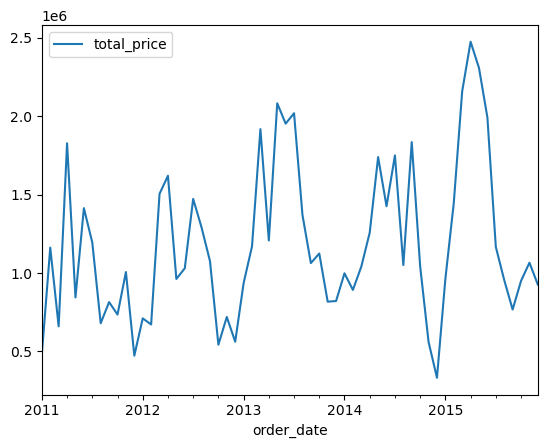

In [106]:
sales_by_month.plot(x='order_date', y='total_price')

In [107]:
plt.show()

# Reporting plot

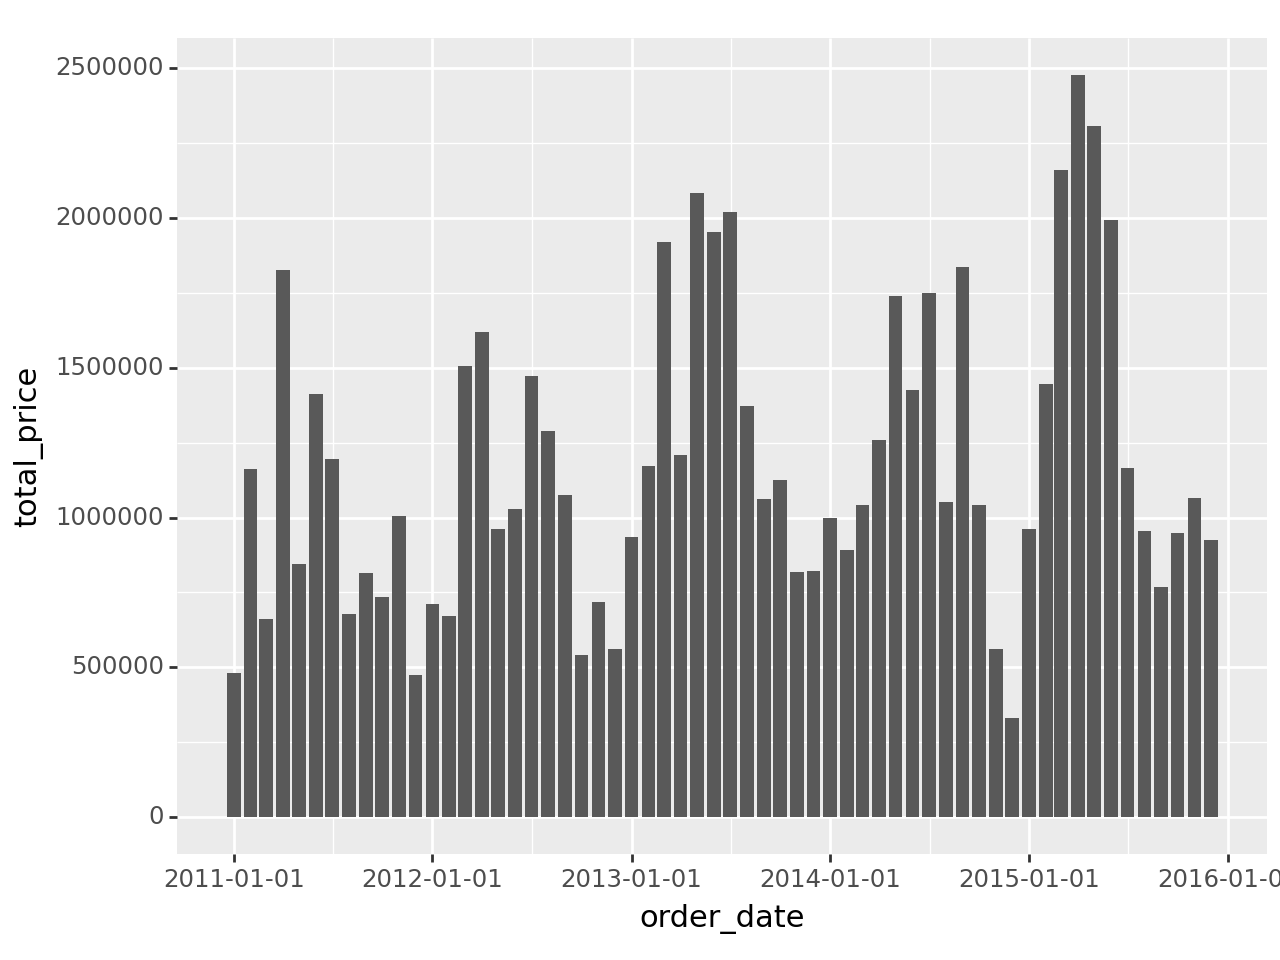

<Figure Size: (640 x 480)>

In [113]:
ggplot(data=sales_by_month, mapping=aes(x='order_date', y='total_price')) + \
    geom_col()

In [134]:
usd_fmt = currency_format(prefix='$', digits=0, big_mark=',')

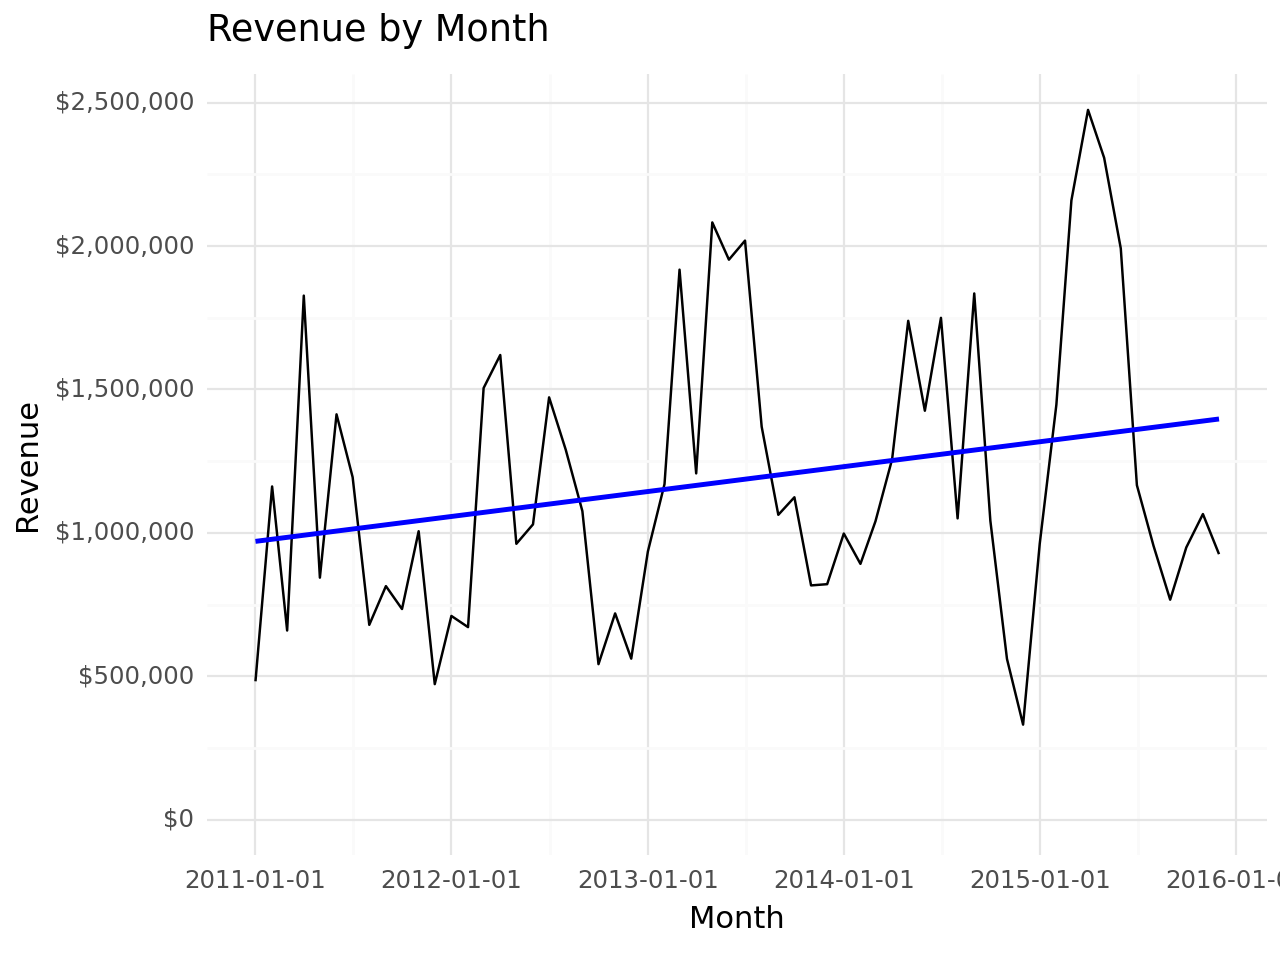

<Figure Size: (640 x 480)>

In [142]:
ggplot(data=sales_by_month, mapping=aes(x='order_date', y='total_price')) + \
    geom_line() + \
    geom_smooth(
        method = 'lm', 
        se = False, 
        color = 'blue', 
        span = 0.3) + \
    scale_y_continuous(labels = usd_fmt) + \
    labs(
    title = "Revenue by Month",
    x = "Month",
    y = "Revenue"
) + \
    theme_minimal() + \
    expand_limits(y=0)
    
#"Method should be one of ['lm', 'ols', 'wls', 'rlm', 'glm', 'gls', 'lowess', 'loess', 'mavg', 'gpr']"

In [143]:
df

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,location,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX


# Sales per year and category 3

## Manipulate

In [155]:
sales_by_month_cat_2 = df[['category_2', 'order_date', 'total_price']] \
    .set_index('order_date') \
    .groupby('category_2') \
    .resample('W') \
    .agg(func={"total_price":np.sum}) \
    .reset_index()

In [156]:
sales_by_month_cat_2

,category_2,order_date,total_price
0,Cross Country Race,2011-01-16,61750
1,Cross Country Race,2011-01-23,25050
2,Cross Country Race,2011-01-30,56860
3,Cross Country Race,2011-02-06,8740
4,Cross Country Race,2011-02-13,78070
...,...,...,...
2324,Triathalon,2015-11-29,21250
2325,Triathalon,2015-12-06,5850
2326,Triathalon,2015-12-13,0
2327,Triathalon,2015-12-20,10200


## Visualization sales by month category 2

### Simple plot

<Axes: xlabel='order_date'>

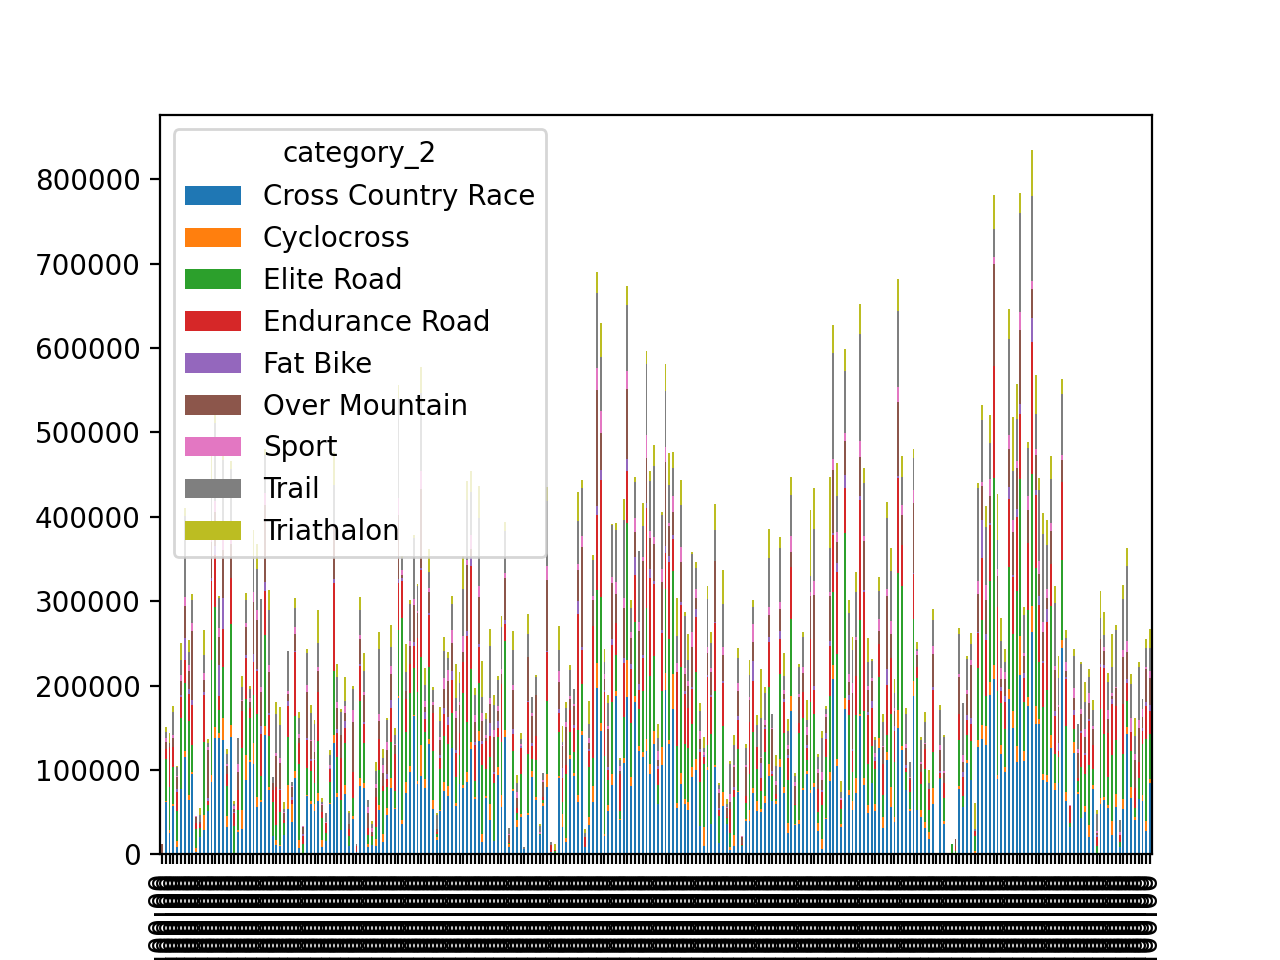

In [160]:
sales_by_month_cat_2 \
    .pivot(
    index = 'order_date',
    columns = 'category_2',
    values = 'total_price'
) \
    .fillna(0) \
    .plot.bar(stacked=True)

array([[<Axes: xlabel='order_date'>, <Axes: xlabel='order_date'>,
        <Axes: xlabel='order_date'>],
       [<Axes: xlabel='order_date'>, <Axes: xlabel='order_date'>,
        <Axes: xlabel='order_date'>],
       [<Axes: xlabel='order_date'>, <Axes: xlabel='order_date'>,
        <Axes: xlabel='order_date'>]], dtype=object)

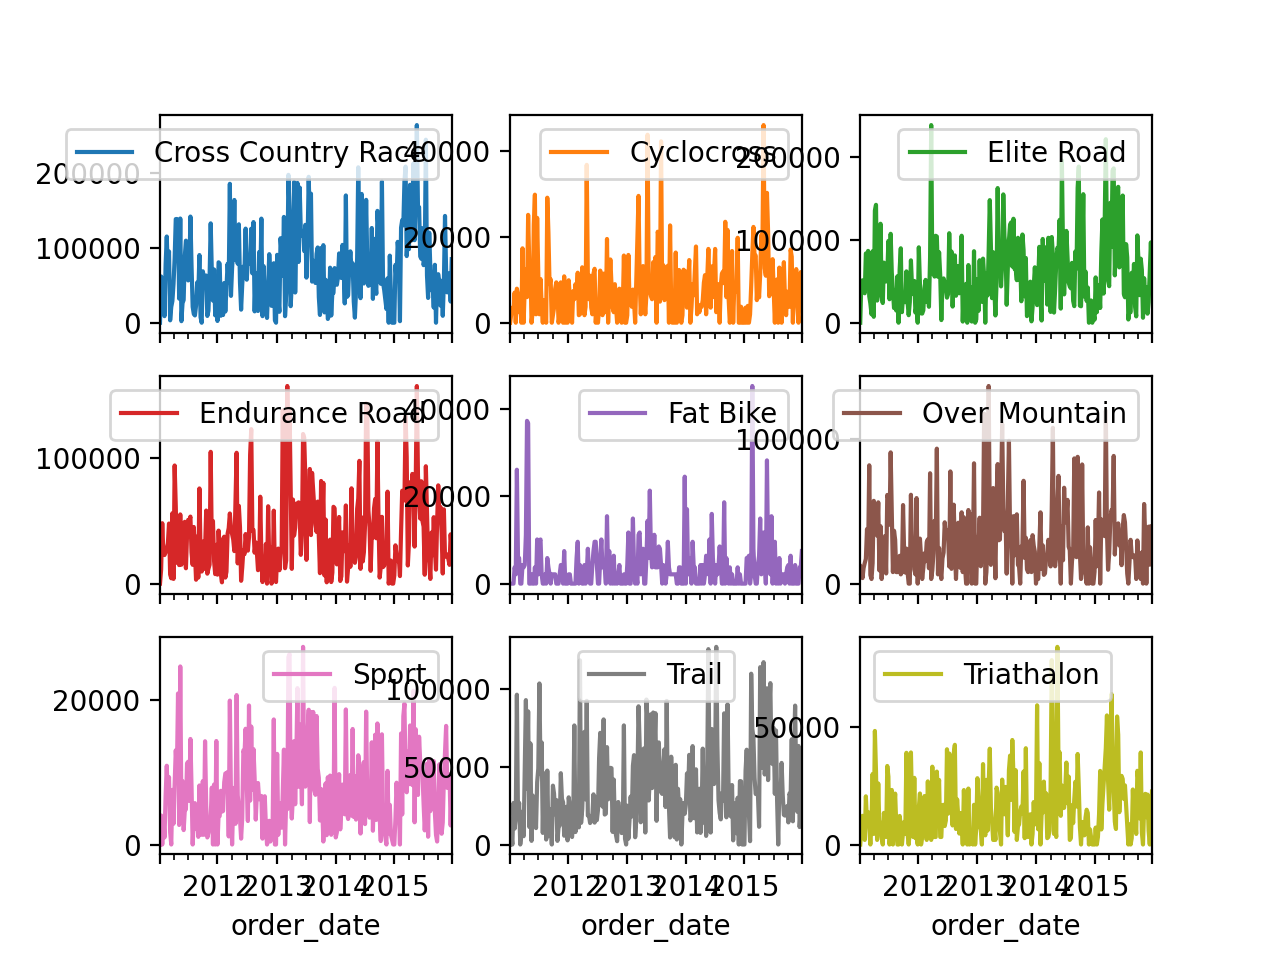

In [163]:
sales_by_month_cat_2 \
    .pivot(
    index='order_date',
    columns='category_2',
    values='total_price'
) \
    .fillna(0) \
    .plot(kind = 'line', subplots = True, layout = (3, 3))

### Reporting plot

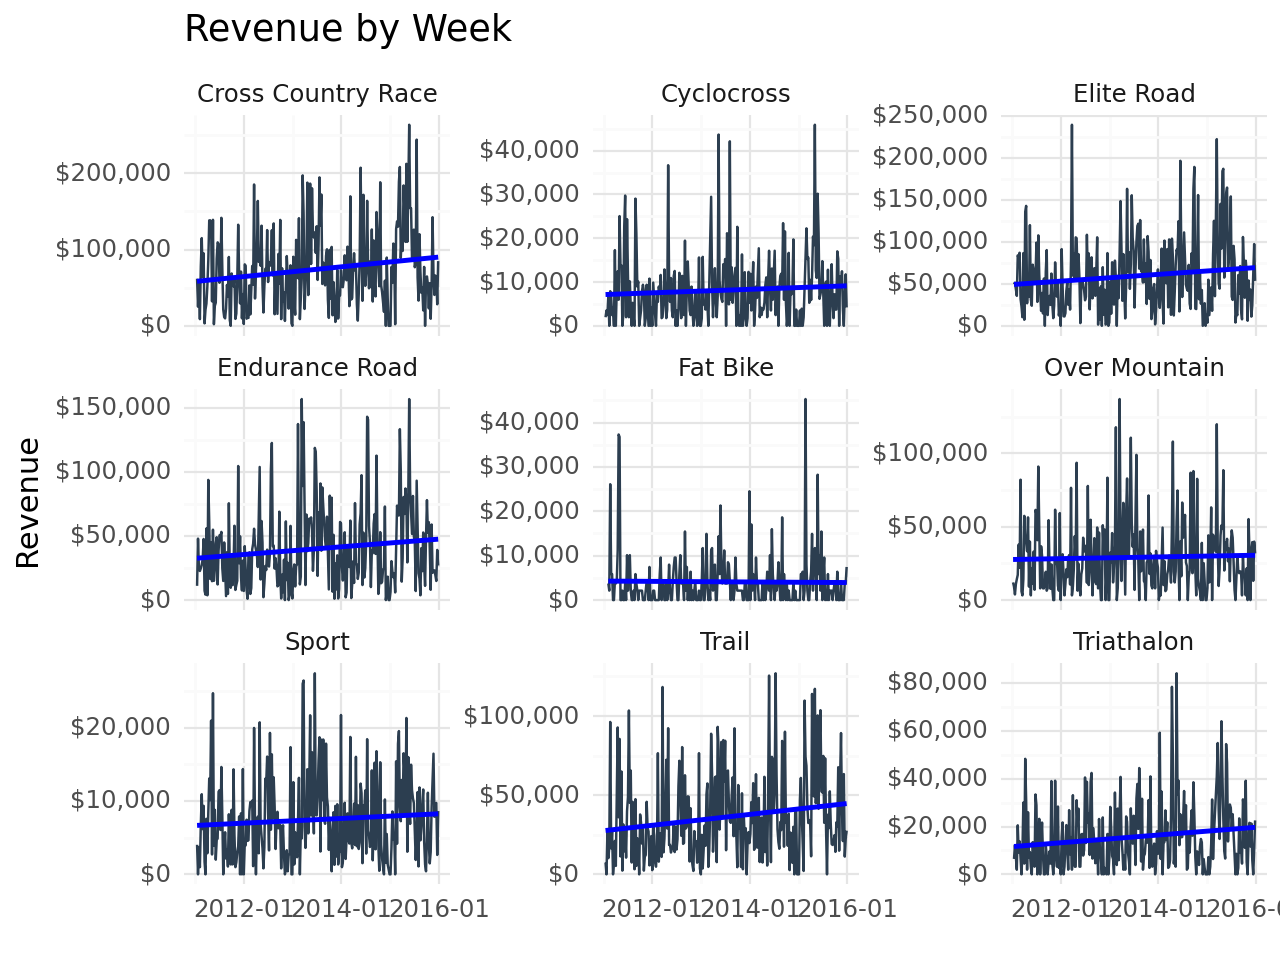

<Figure Size: (640 x 480)>

In [183]:
from plotnine import scale_x_datetime

ggplot(
    data=sales_by_month_cat_2, 
    mapping=aes(x='order_date', y='total_price', color='category_2')) + \
    geom_line(color = '#2c3e50') + \
    geom_smooth(
        method = 'lm',
        se=False,
        color='blue'
    ) + \
    facet_wrap(
        facets='category_2',
        ncol=3,
        scales='free_y'
    ) + \
    theme(
        subplots_adjust={'wspace': 0.25},
        axis_text_y=element_text(size=6),
        axis_text_x=element_text(size=6)
    ) + \
    scale_y_continuous(labels = usd_fmt) + \
    scale_x_datetime(
        breaks = date_breaks("2 years"),
        labels=date_format(fmt="%Y-%m")
    ) + \
    labs(
        title = "Revenue by Week",
        x = "", y = "Revenue"
    ) + \
    theme_minimal()

# Pickle

In [185]:
df.to_pickle('00_data_wrangled/0bike_order_line_wrangled_df.pkl')

## CSV

In [186]:
df.to_csv('00_data_wrangled/0bike_order_line_wrangled_df.csv')

## Excel

In [188]:
df.to_excel('00_data_wrangled/0bike_order_line_wrangled_df.xlsx')